#IMPORT LIBRARIES

In [66]:
import numpy as np  # Library for math operations & generating data
import pandas as pd # Library for DataFrame & storing data

#GENERATE SAMPLES - PARAMETERS

In [67]:
# Generate 1000 samples of leg lengths (a, b)
NUM_SAMPLES = 1000 # Total number of synthetic triangles
A = np.random.uniform(1, 100, NUM_SAMPLES)  # Random A
B = np.random.uniform(1, 100, NUM_SAMPLES)  # Random B

#PYTHAGORAS THEOREM

In [68]:
# Compute hypotenuse using Pythagoras' theorem
C = np.sqrt(A**2 + B**2)  # Pythagorean theorem

#CREATE DATA


In [69]:
# Create a DataFrame
DATA = pd.DataFrame({'a': A, 'b': B, 'c': C})  # DATAFrame with A, B, C

#SAVE DATA

In [82]:
DATA.to_csv("DATAset.csv", index=False)  # Save data to CSV


#ML LIBRARIES - MODEL

In [71]:
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.linear_model import LinearRegression      # ML model
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation

#SPLIT DATA INTO TRAIN & TEST

In [72]:
# Split data
X = DATA[['a', 'b']]  # Features
Y = DATA['c']         # Target
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2, random_state=42)


#TRAIN MODEL

In [73]:
# Train model
MODEL = LinearRegression()
MODEL.fit(X_TRAIN, Y_TRAIN)  # FIT model to training data

LinearRegression()

#PREDICT ON TEST DATA

In [74]:
Y_PRED = MODEL.predict(X_TEST)  # Predict hypotenuse from A & B

#EVALUATE

In [76]:
# Evaluation metrics
MSE = mean_squared_error(Y_TEST, Y_PRED)  # Mean squared error
R2 = r2_score(Y_TEST, Y_PRED)             # R² score

print(f"Mean Squared Error: {MSE:.4f}")
print(f"R² Score: {R2:.4f}")


Mean Squared Error: 38.7482
R² Score: 0.9494


#VISUALIZE DATA

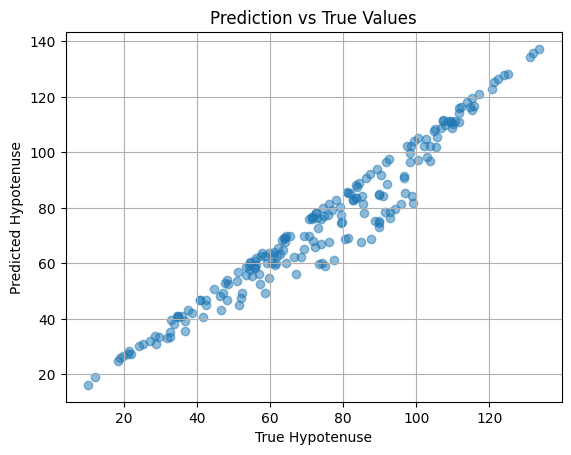

In [77]:
plt.scatter(Y_TEST, Y_PRED, alpha=0.5)  # For Visualization
plt.xlabel("True Hypotenuse")
plt.ylabel("Predicted Hypotenuse")
plt.title("Prediction vs True Values")
plt.grid(True)
plt.show()

#USER INPUT AND NEW PREDICTIONS

In [83]:
# Ask the user for new inputs (lengths of triangle legs)

NEW_A = float(input("Enter length of side a: "))  # Input for A
NEW_B = float(input("Enter length of side b: "))  # Input for B

Enter length of side a: 300
Enter length of side b: 500


In [84]:
# Predict the hypotenuse using the trained model
NEW_PRED = MODEL.predict([[NEW_A, NEW_B]])[0]  # Model prediction

# Ground truth using actual Pythagorean theorem
TRUE_C = np.sqrt(NEW_A**2 + NEW_B**2)

print(f"Predicted Hypotenuse: {NEW_PRED:.4f}")
print(f"True Hypotenuse (Pythagorean): {TRUE_C:.4f}")

Predicted Hypotenuse: 559.3470
True Hypotenuse (Pythagorean): 583.0952


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


VISUALIZE THE PREDICTION

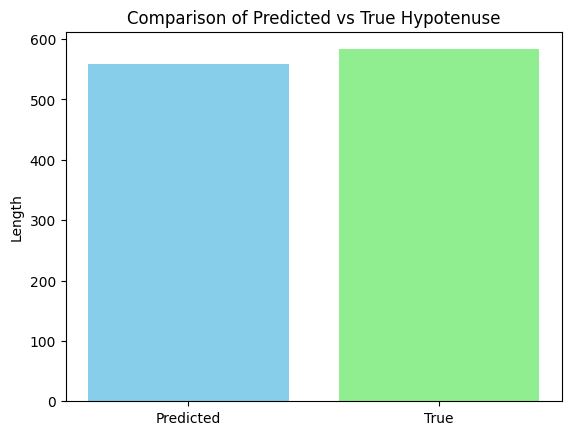

In [85]:
# Visualize the prediction

plt.figure()
plt.bar(['Predicted', 'True'], [NEW_PRED, TRUE_C], color=['skyblue', 'lightgreen'])
plt.title("Comparison of Predicted vs True Hypotenuse")
plt.ylabel("Length")
plt.show()